Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [4]:
rr = pd.read_csv(r"C:\Users\jdgoe\Downloads\Untitled spreadsheet - Table 1 (1).csv")
rr.head()

,Cause of Death,Year,Month,Vaccination status,Count of deaths,Person-years,"Age-standardised mortality rate / 100,000 person-years",Noted as Unreliable,Lower confidence limit,Upper confidence limit
0,All causes,2021,January,Unvaccinated,52459,3050246,2507.6,NaN,2485.3,2530.0
1,All causes,2021,January,"First dose, less than 21 days ago",7583,221773,1333.2,NaN,424.8,2241.6
2,All causes,2021,January,"First dose, at least 21 days ago",2365,35929,1718.7,NaN,1542.6,1894.8
3,All causes,2021,January,"Second dose, less than 21 days ago",433,23304,265.5,NaN,183.7,347.3
4,All causes,2021,January,"Second dose, between 21 days and 6 months ago",82,4050,166.1,NaN,131.4,206.9


October in row 162 has a space at the end so we will replace that

In [5]:
# rr.loc[162, 'Month'] = 'October'
# rr.loc[163, 'Month'] = 'October'

In [6]:
# month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
#              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
# rr['month_range'] = rr.apply(lambda row: 'July-Dec' if month_map.get(row['Month'], 0) >= 7 else '', axis=1)


In [7]:
rr['Year'] = rr['Year'].astype(str)
rr['Age-standardised mortality rate / 100,000 person-years'] = pd.to_numeric(rr['Age-standardised mortality rate / 100,000 person-years'], errors='coerce')
rr = rr.rename(columns={'Age-standardised mortality rate / 100,000 person-years': 'rate'})

In [8]:
rtwo = rr[(rr['Year'] == '2021') & (rr['Cause of Death'] == 'All causes')]

In [9]:
rt = rtwo

In [10]:
# fill numerical columns that are empty or have 'x' with '0'
rt = rt.replace(['nan', 'x'], np.nan)
rt = rt.replace('x', np.nan)
rt = rt.fillna('0') # fill nan and x with 0

In [11]:
# turn mortality rate and confidence limits into integers
rt['rate'] = pd.to_numeric(rt['rate'], errors='coerce')
rt['rate'] = rt['rate'].astype(int)
rt['Upper confidence limit'] = pd.to_numeric(rt['Upper confidence limit'], errors='coerce')
rt['Upper confidence limit'] = rt['Upper confidence limit'].astype(int)
rt['Lower confidence limit'] = pd.to_numeric(rt['Lower confidence limit'], errors='coerce')
rt['Lower confidence limit'] = rt['Lower confidence limit'].astype(int)

In [63]:
rt['SD'] = (rt['Upper confidence limit'] - rt['Lower confidence limit']) / 2

<AxesSubplot:xlabel='Month', ylabel='rate'>

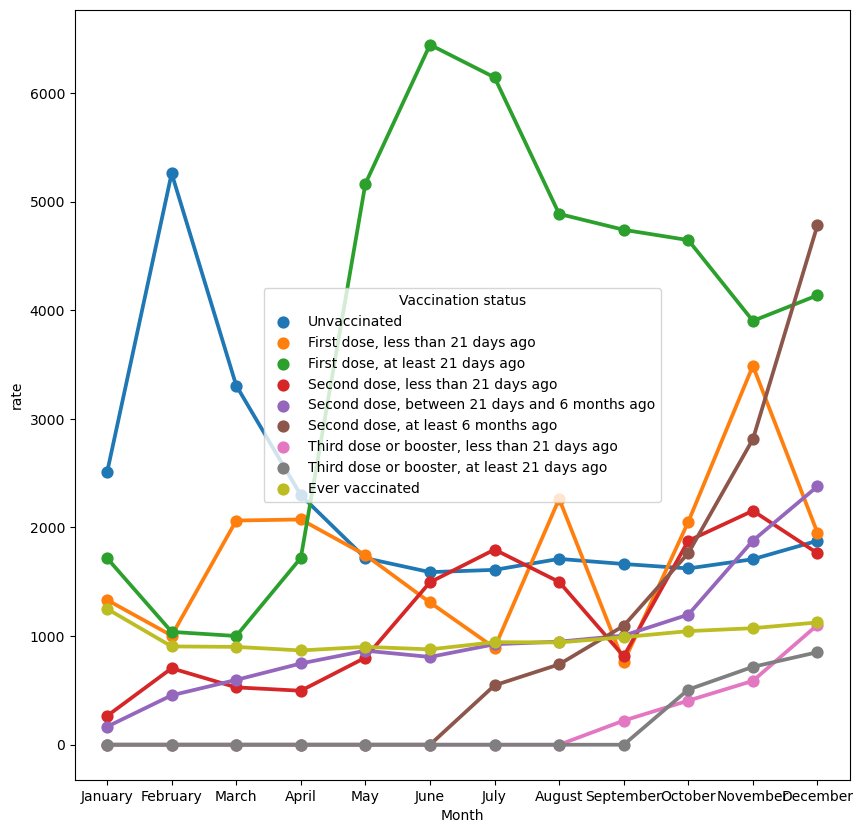

In [14]:
fig = plt.figure(figsize=(10,10))
sns.pointplot(x="Month", y="rate", hue="Vaccination status", data=rt)

Text(-0.06, -0.06, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland')

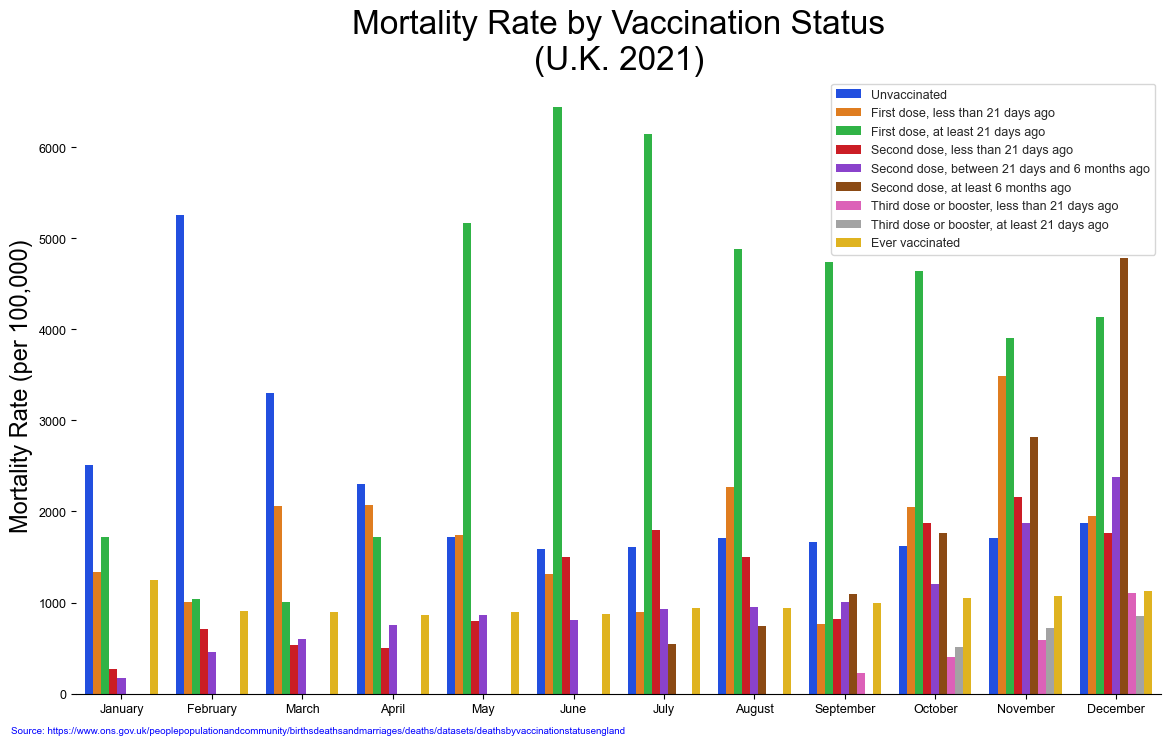

In [15]:
fig = plt.figure(figsize=(14,8))
sns.barplot(x='Month', y='rate', hue='Vaccination status', data=rt, palette='bright')

plt.rcParams['figure.dpi'] = 360
sns.set(style='whitegrid')
sns.despine(top=True, right=True, left=True)
plt.ylabel('Mortality Rate (per 100,000)', size=17)
plt.xlabel('')
plt.xticks(size=9)
plt.yticks(size=9)
#plt.ylim(0, 5001)
plt.title('Mortality Rate by Vaccination Status\n(U.K. 2021)', size=24)
plt.legend(fontsize=9)
plt.text(-.06, -0.06, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland', fontsize=7, ha='left', va='center', color='blue', transform=plt.gca().transAxes)

In [16]:
r1 = rt[rt['Month'].isin(['May', 'June', 'July', 'August'])]
r2 = rt[rt['Month'].isin(['September', 'October', 'November', 'December'])]

In [17]:
# r2 = r2[r2['Vaccination status'] != 'First dose, less than 21 days ago']
# r2 = r2[r2['Vaccination status'] != 'Second dose, less than 21 days ago']
# r2 = r2[r2['Vaccination status'] != 'Third dose or booster, less than 21 days ago']

Text(-0.1, -0.05, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland')

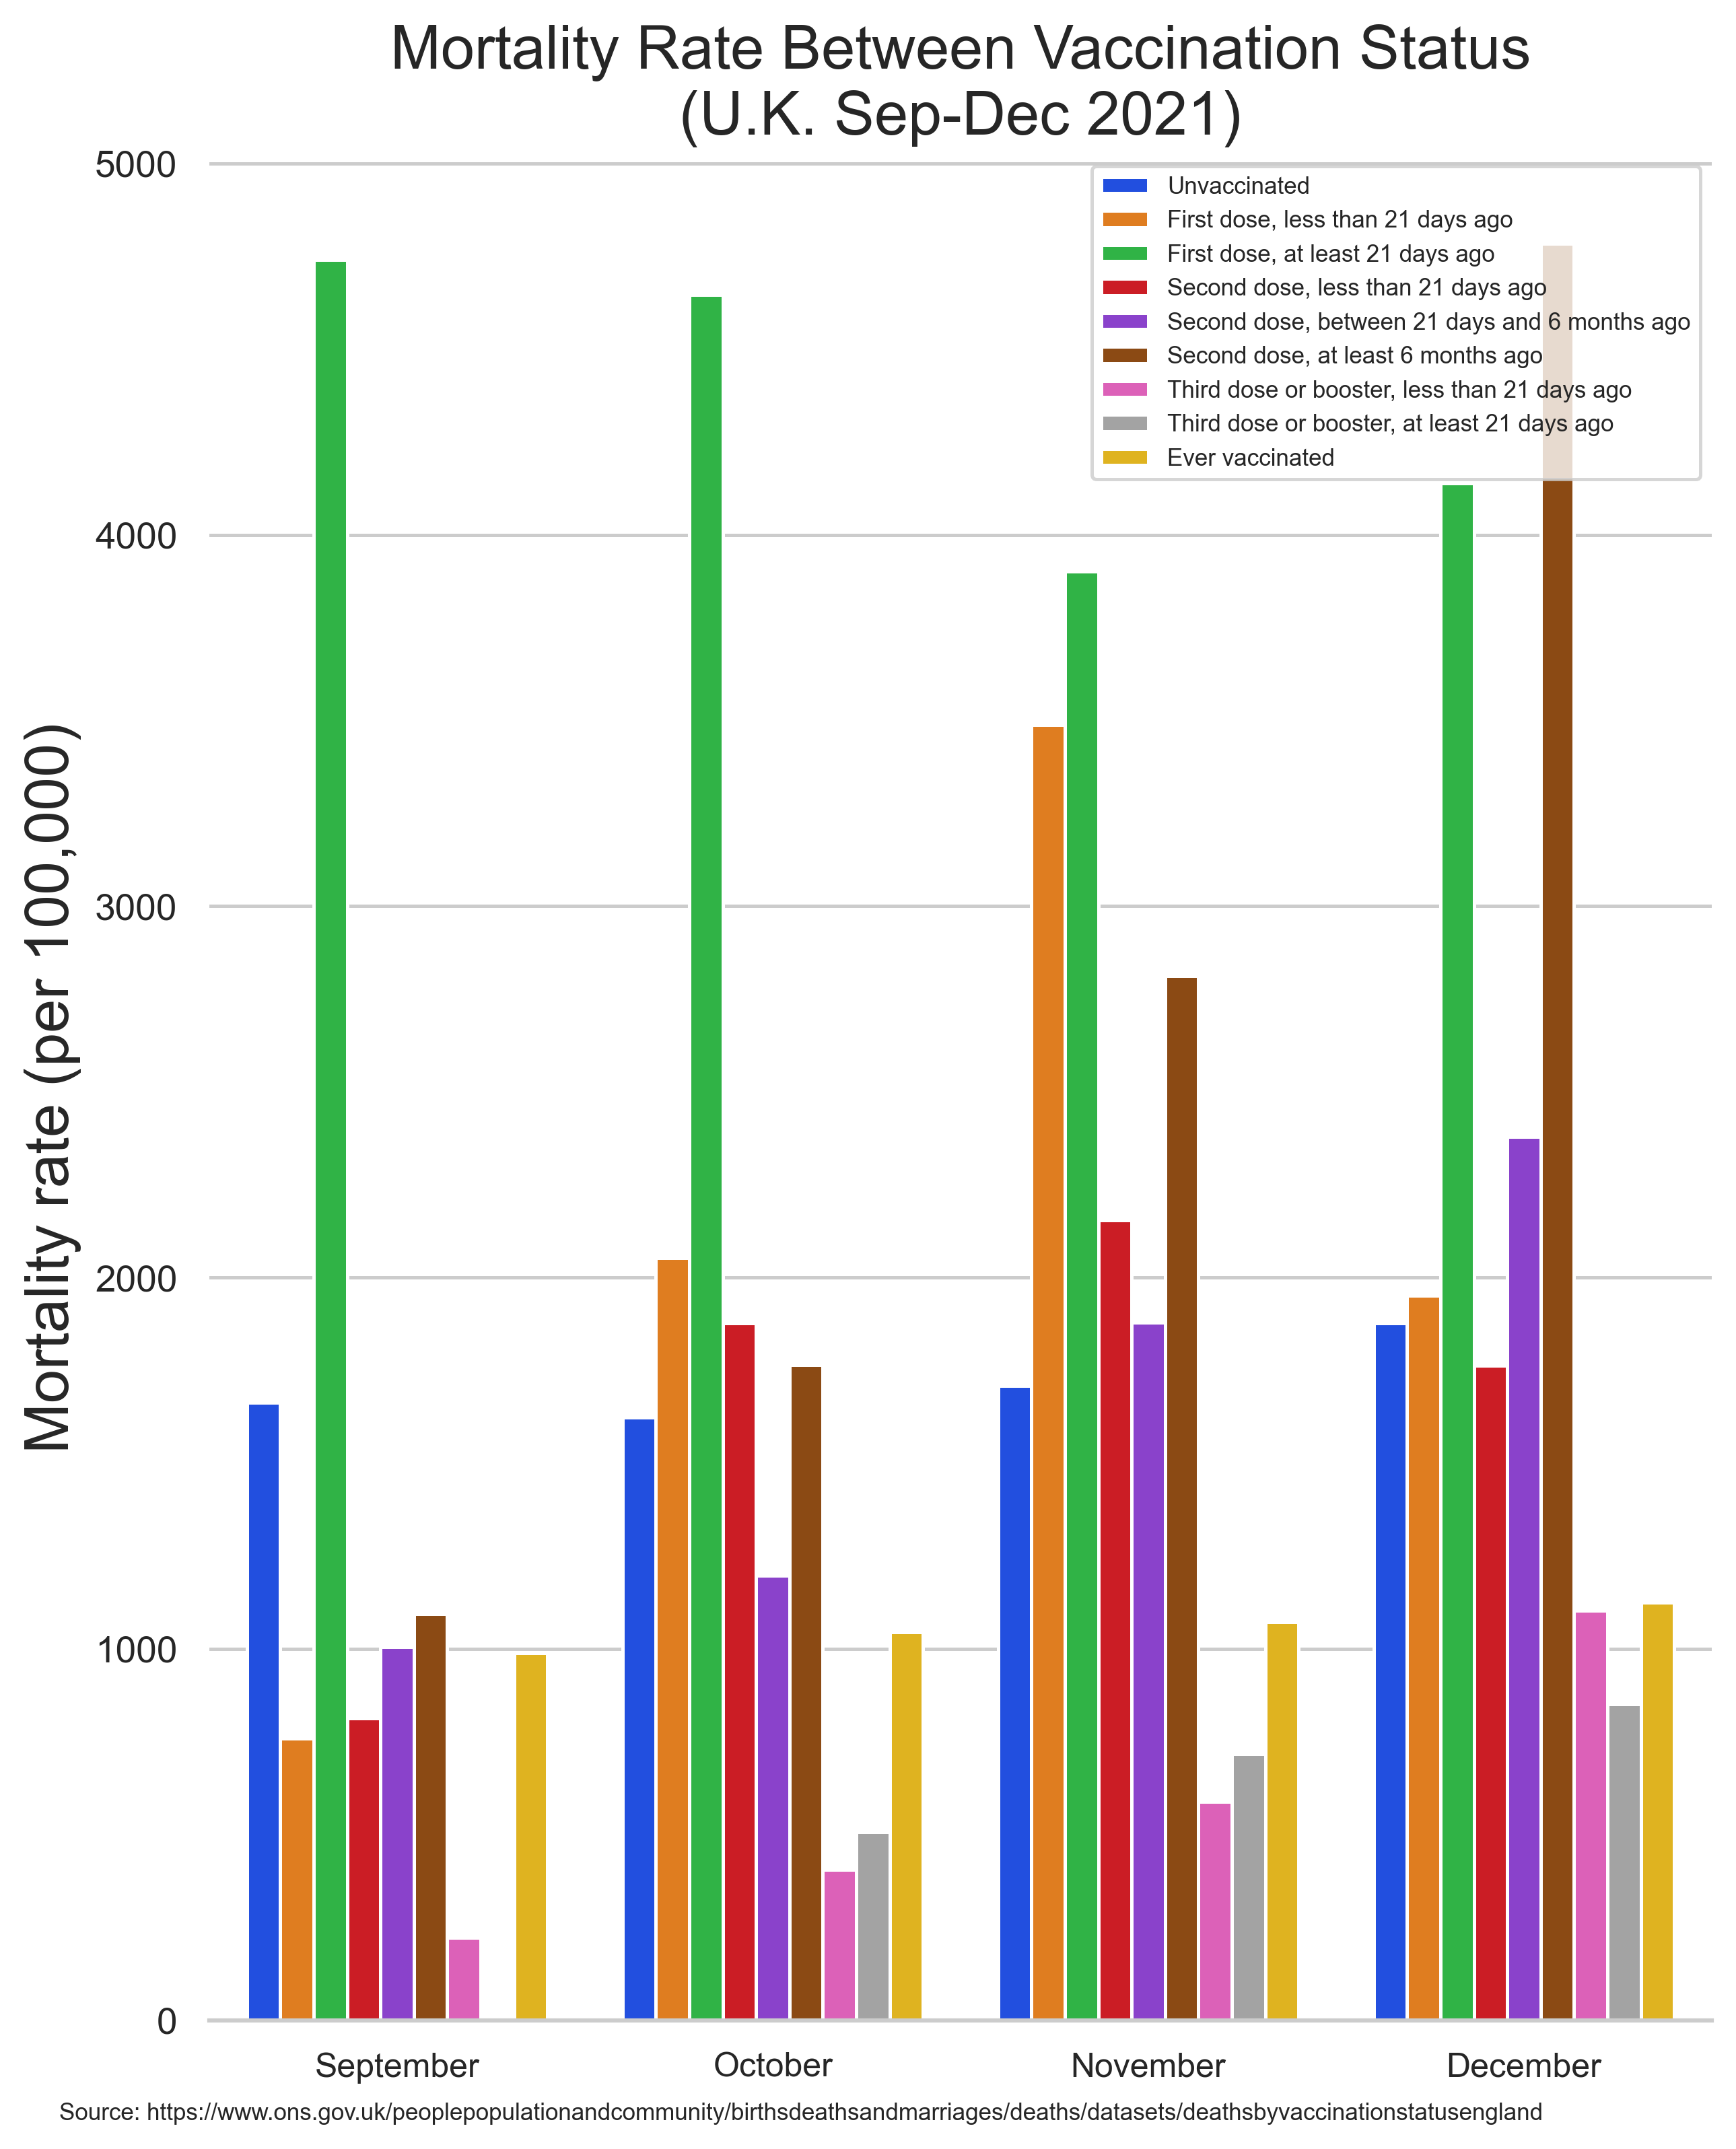

In [18]:
fig = plt.figure(figsize=(8,10))
plt.rcParams['figure.dpi'] = 360
sns.set(style='whitegrid')
sns.barplot(x='Month', y='rate', hue='Vaccination status', data=r2, palette='bright')
sns.despine(top=True, right=True, left=True)
plt.ylabel('Mortality rate (per 100,000)', size=18)
plt.xlabel('')
plt.xticks(size=10)
plt.legend(loc='upper right', fontsize=7)
plt.title('Mortality Rate Between Vaccination Status\n(U.K. Sep-Dec 2021)', size = 18)
plt.text(-.1, -0.05, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland', fontsize=7, ha='left', va='center', transform=plt.gca().transAxes)

Text(-0.1, -0.05, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland')

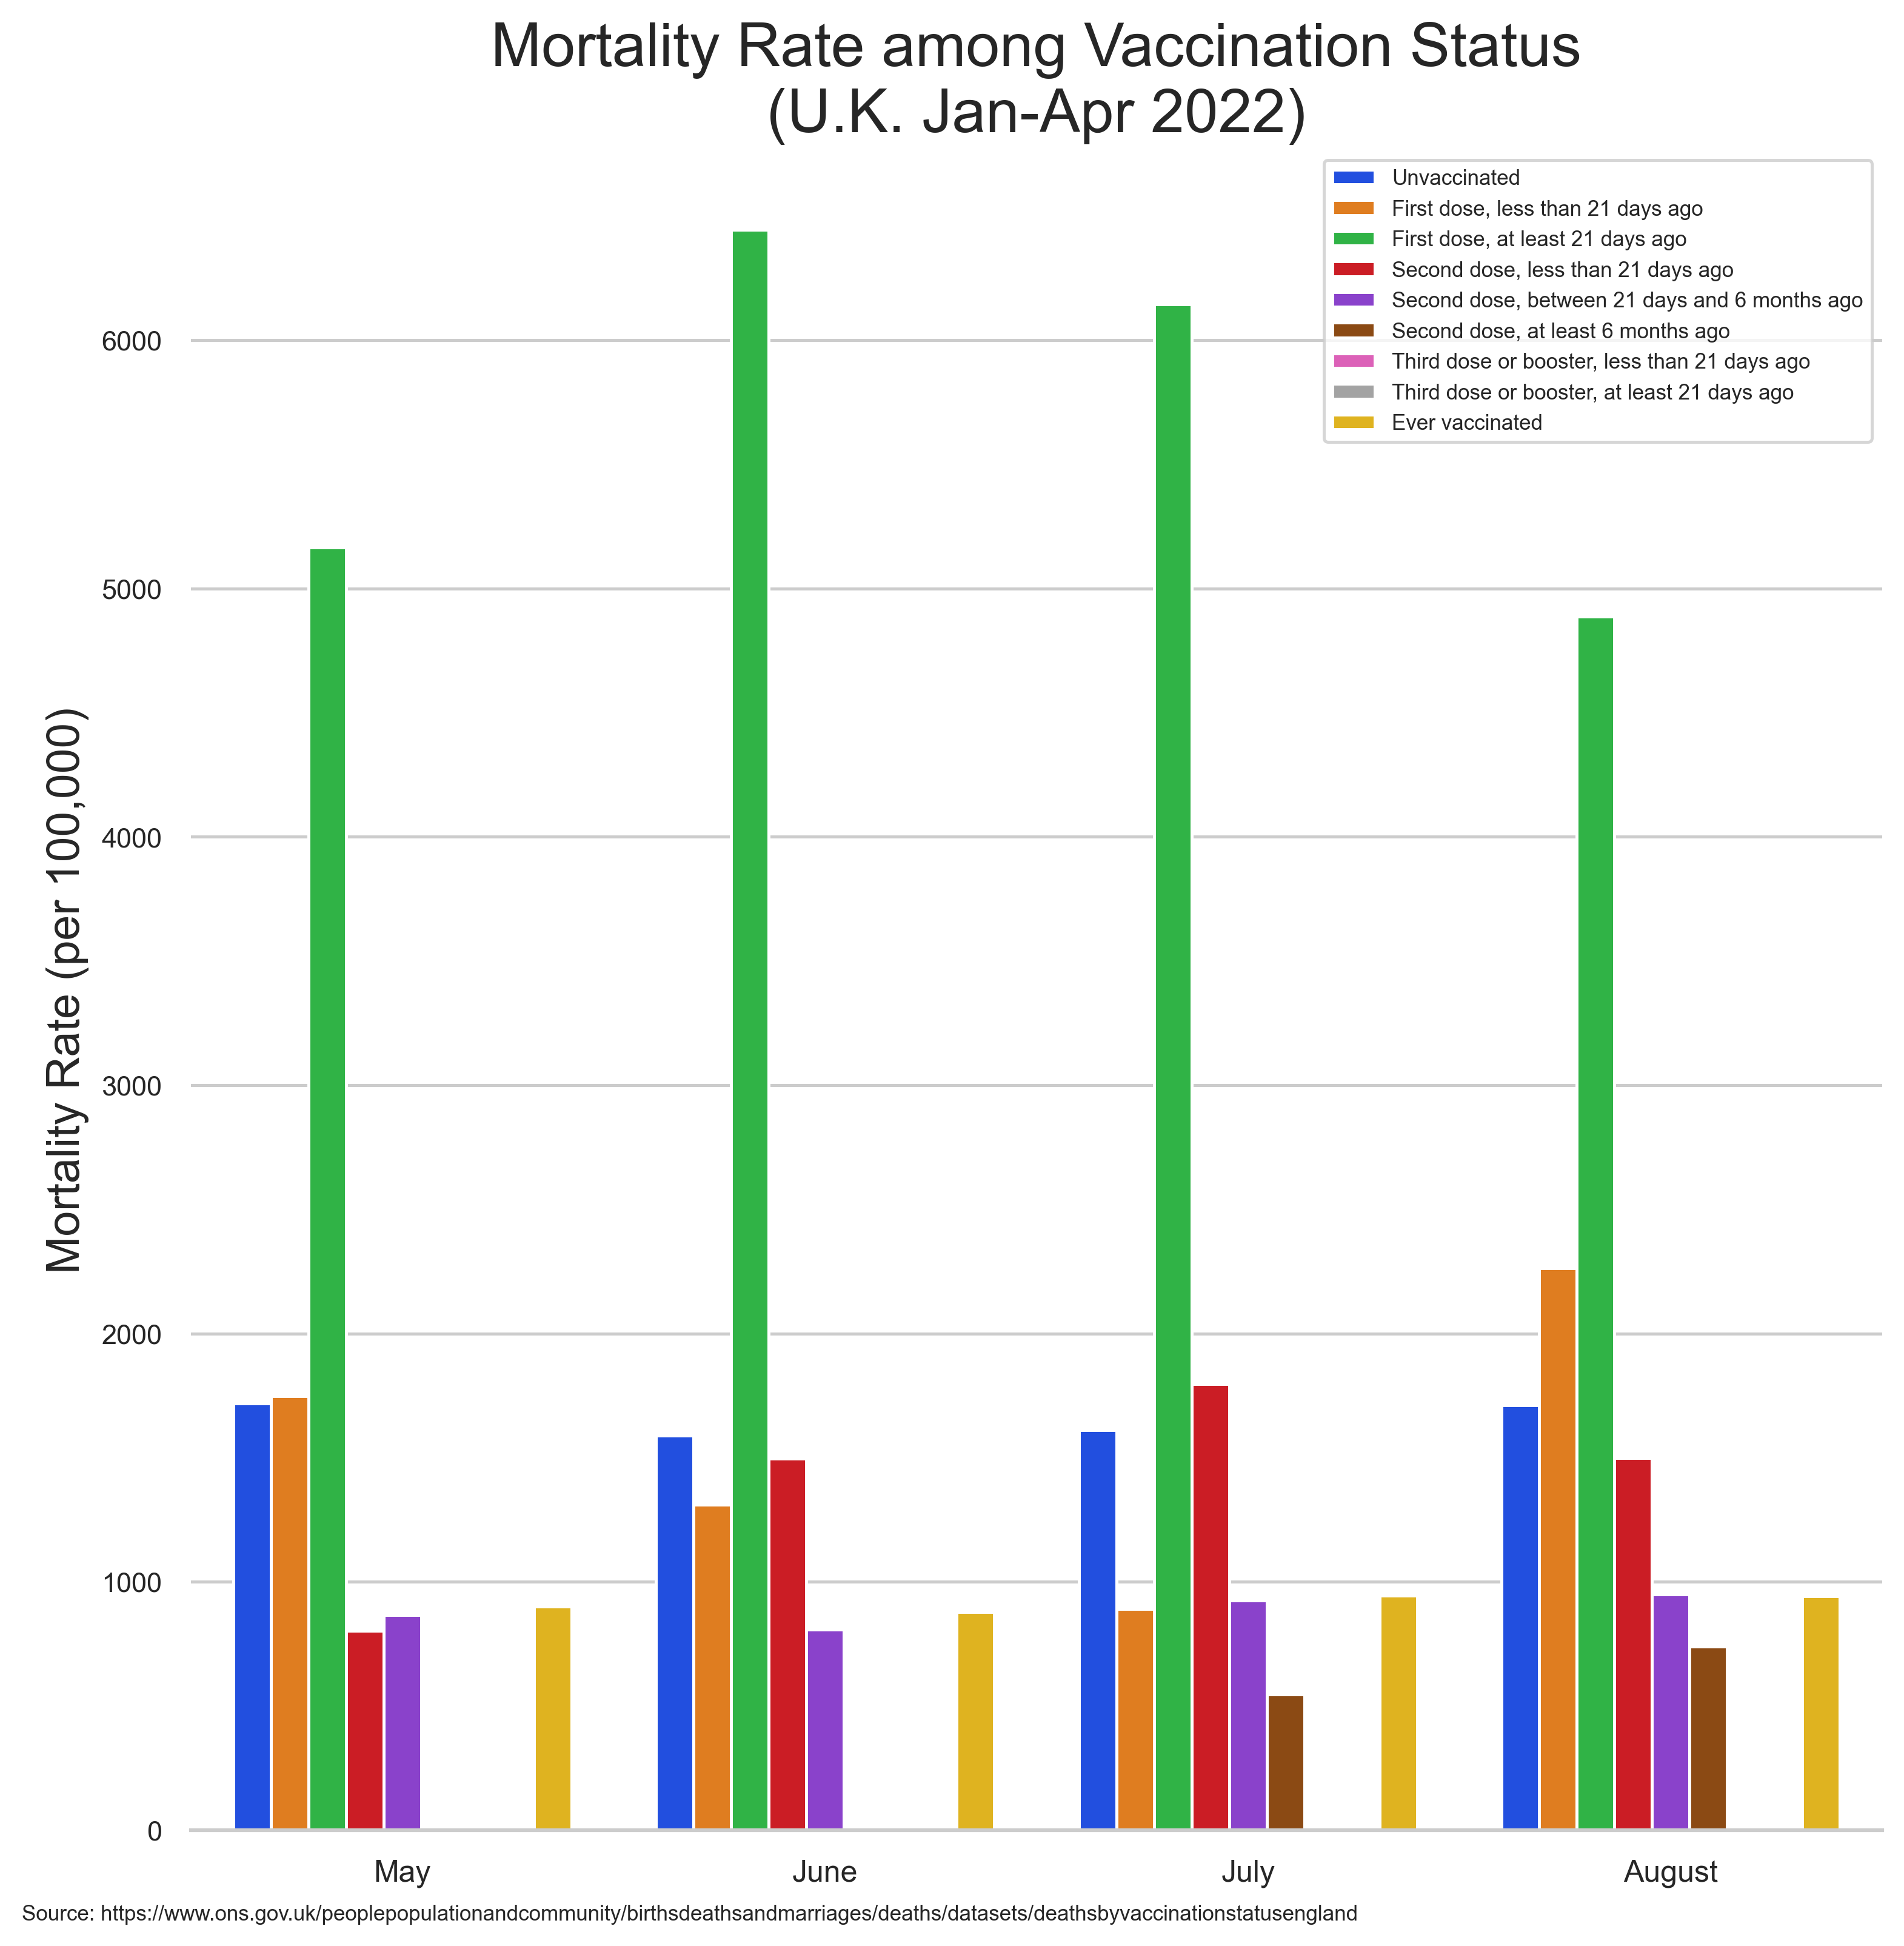

In [19]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 360
sns.set(style='whitegrid')
sns.barplot(x='Month', y='rate', hue='Vaccination status', data=r1, palette='bright')
sns.despine(top=True, right=True, left=True)
plt.ylabel('Mortality Rate (per 100,000)', size=15)
plt.xlabel('')
plt.xticks(size=10)
plt.yticks(size=9)
plt.legend(loc='upper right', fontsize=7)
sns.set_palette(sns.color_palette('bright'))
plt.title('Mortality Rate among Vaccination Status\n(U.K. Jan-Apr 2022)', size = 20)
plt.text(-.1, -0.05, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland', fontsize=7, ha='left', va='center', transform=plt.gca().transAxes)

In [20]:
new_order = ['Unvaccinated', 'First dose, less than 21 days ago', 'First dose, at least 21 days ago', 'Second dose, less than 21 days ago', 'Second dose, between 21 days and 6 months ago', 'Second dose, at least 6 months ago', 'Third dose or booster, at least 21 days ago', 'Ever vaccinated']
new_order2 = ['Unvaccinated', 'First dose, less than 21 days ago', 'First dose, at least 21 days ago', 'Second dose, less than 21 days ago', 'Second dose, between 21 days and 6 months ago', 'Ever vaccinated']

In [21]:
colors1 = ['#ffa600',
'#98237c',
'#5437a3',
'#da3065',
'#fe6540', '#82aa3f']
colors2 = ['#ffa600',
'#98237c',
'#5437a3',
'#da3065',
'#fe6540', '#82aa3f']

Text(0.775, 0.35, 'u')

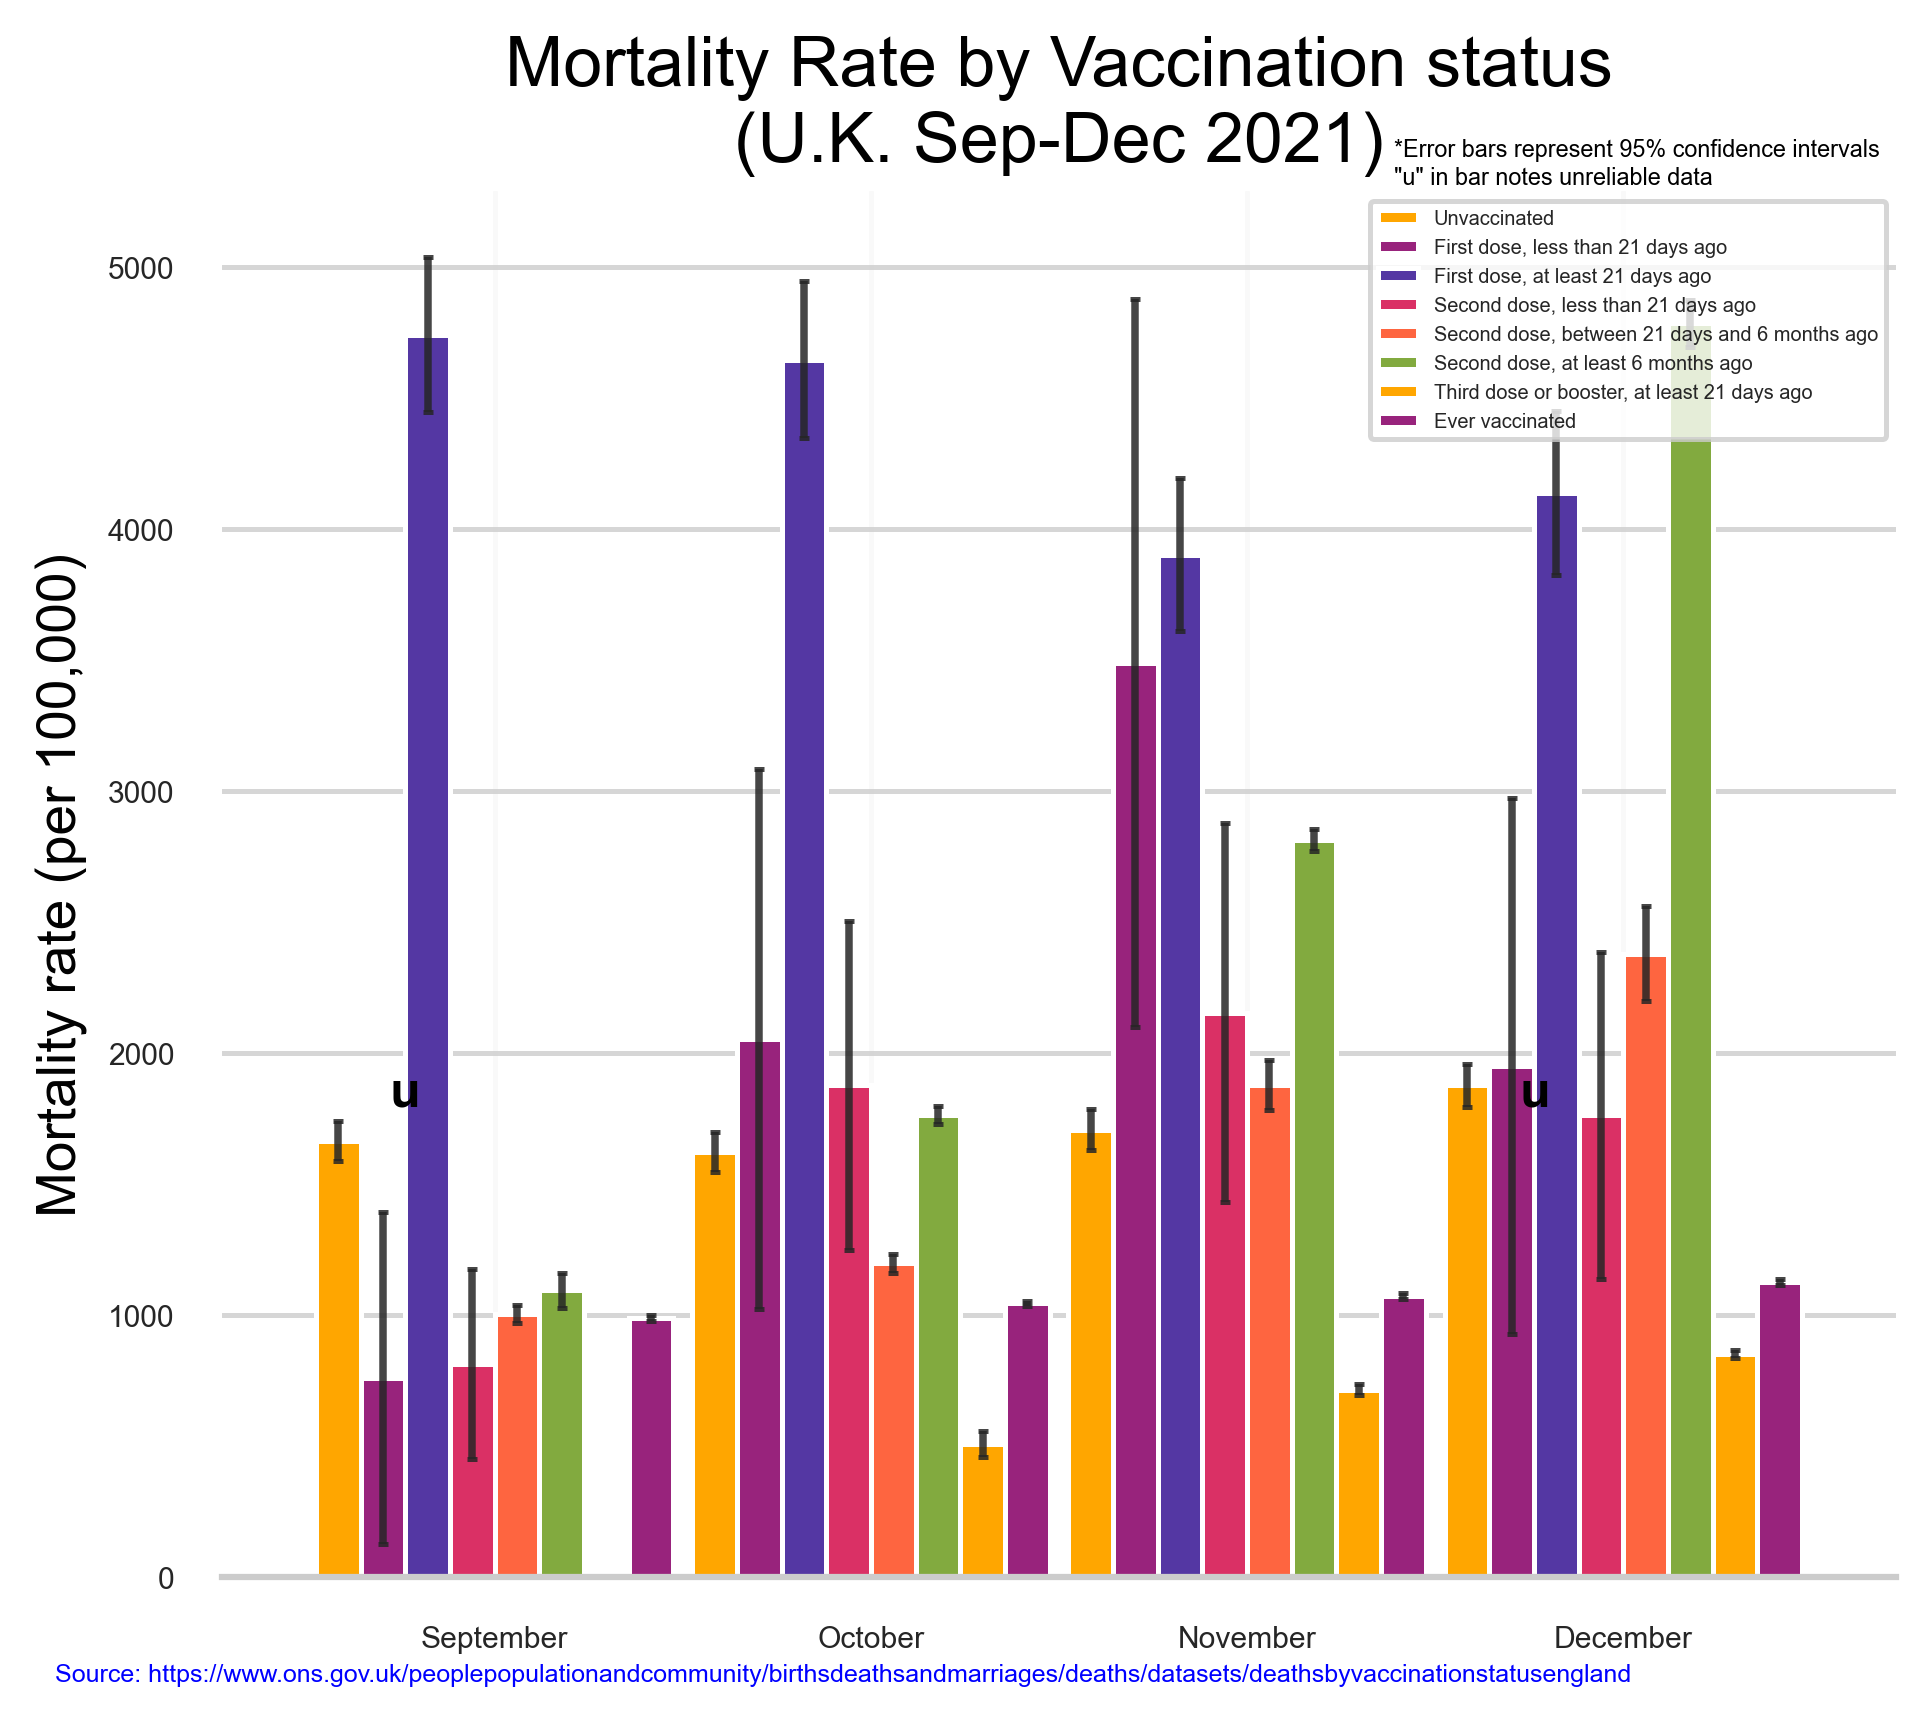

In [22]:
# reshape the dataframe into a wide format for Values
vals = r2.pivot(index='Month', columns='Vaccination status', values='rate')
vals = vals.sort_values(by='Month', ascending=False)
vals = vals.reindex(columns=new_order)

# # reshape the dataframe into a wide format for Errors
yerr = r2.pivot(index='Month', columns='Vaccination status', values='SD')
yerr = yerr.sort_values(by='Month', ascending=False)
yerr = yerr.reindex(columns=new_order)

ax = vals.plot(kind='bar', yerr=yerr, rot=0, capsize=1, figsize=(6,5), color=colors1, width=.95, error_kw={'alpha': 0.85})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.set_ylim(0.01, 3600)
ax.margins(x=.001)
ax.set_title('Mortality Rate by Vaccination status\n(U.K. Sep-Dec 2021)', size=14, color='black')
ax.set_ylabel('Mortality rate (per 100,000)', size=11, color='black')
ax.set_xlabel('')
plt.rcParams['figure.dpi'] = 360
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
# add grid lines to the plot
ax.grid(axis='x', alpha=0.1)
ax.grid(axis='y', alpha=0.8)
_ = ax.legend(loc='upper right', fontsize=4)
plt.text(-.1, -0.07, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland', fontsize=5, ha='left', va='center', color='blue',transform=plt.gca().transAxes)
plt.text(.7, 1.03, '*Error bars represent 95% confidence intervals', fontsize=4.7, ha='left', va='center', color='black', alpha=1, transform=plt.gca().transAxes)
plt.text(.7, 1.01, '"u" in bar notes unreliable data', fontsize=4.7, ha='left', va='center', color='black', alpha=1, transform=plt.gca().transAxes)
plt.text(.1, .35, 'u', fontsize=10, ha='left', va='center', color='black', weight='bold', alpha=1, transform=plt.gca().transAxes)
plt.text(.775, .35, 'u', fontsize=10, ha='left', va='center', color='black', weight='bold', alpha=1, transform=plt.gca().transAxes)

In [23]:
r1 = r1.reset_index()

In [24]:
order2 = ['May', 'June', 'July', 'August']

Text(0.62, 0.77, '*Error bars represent 95% confidence intervals')

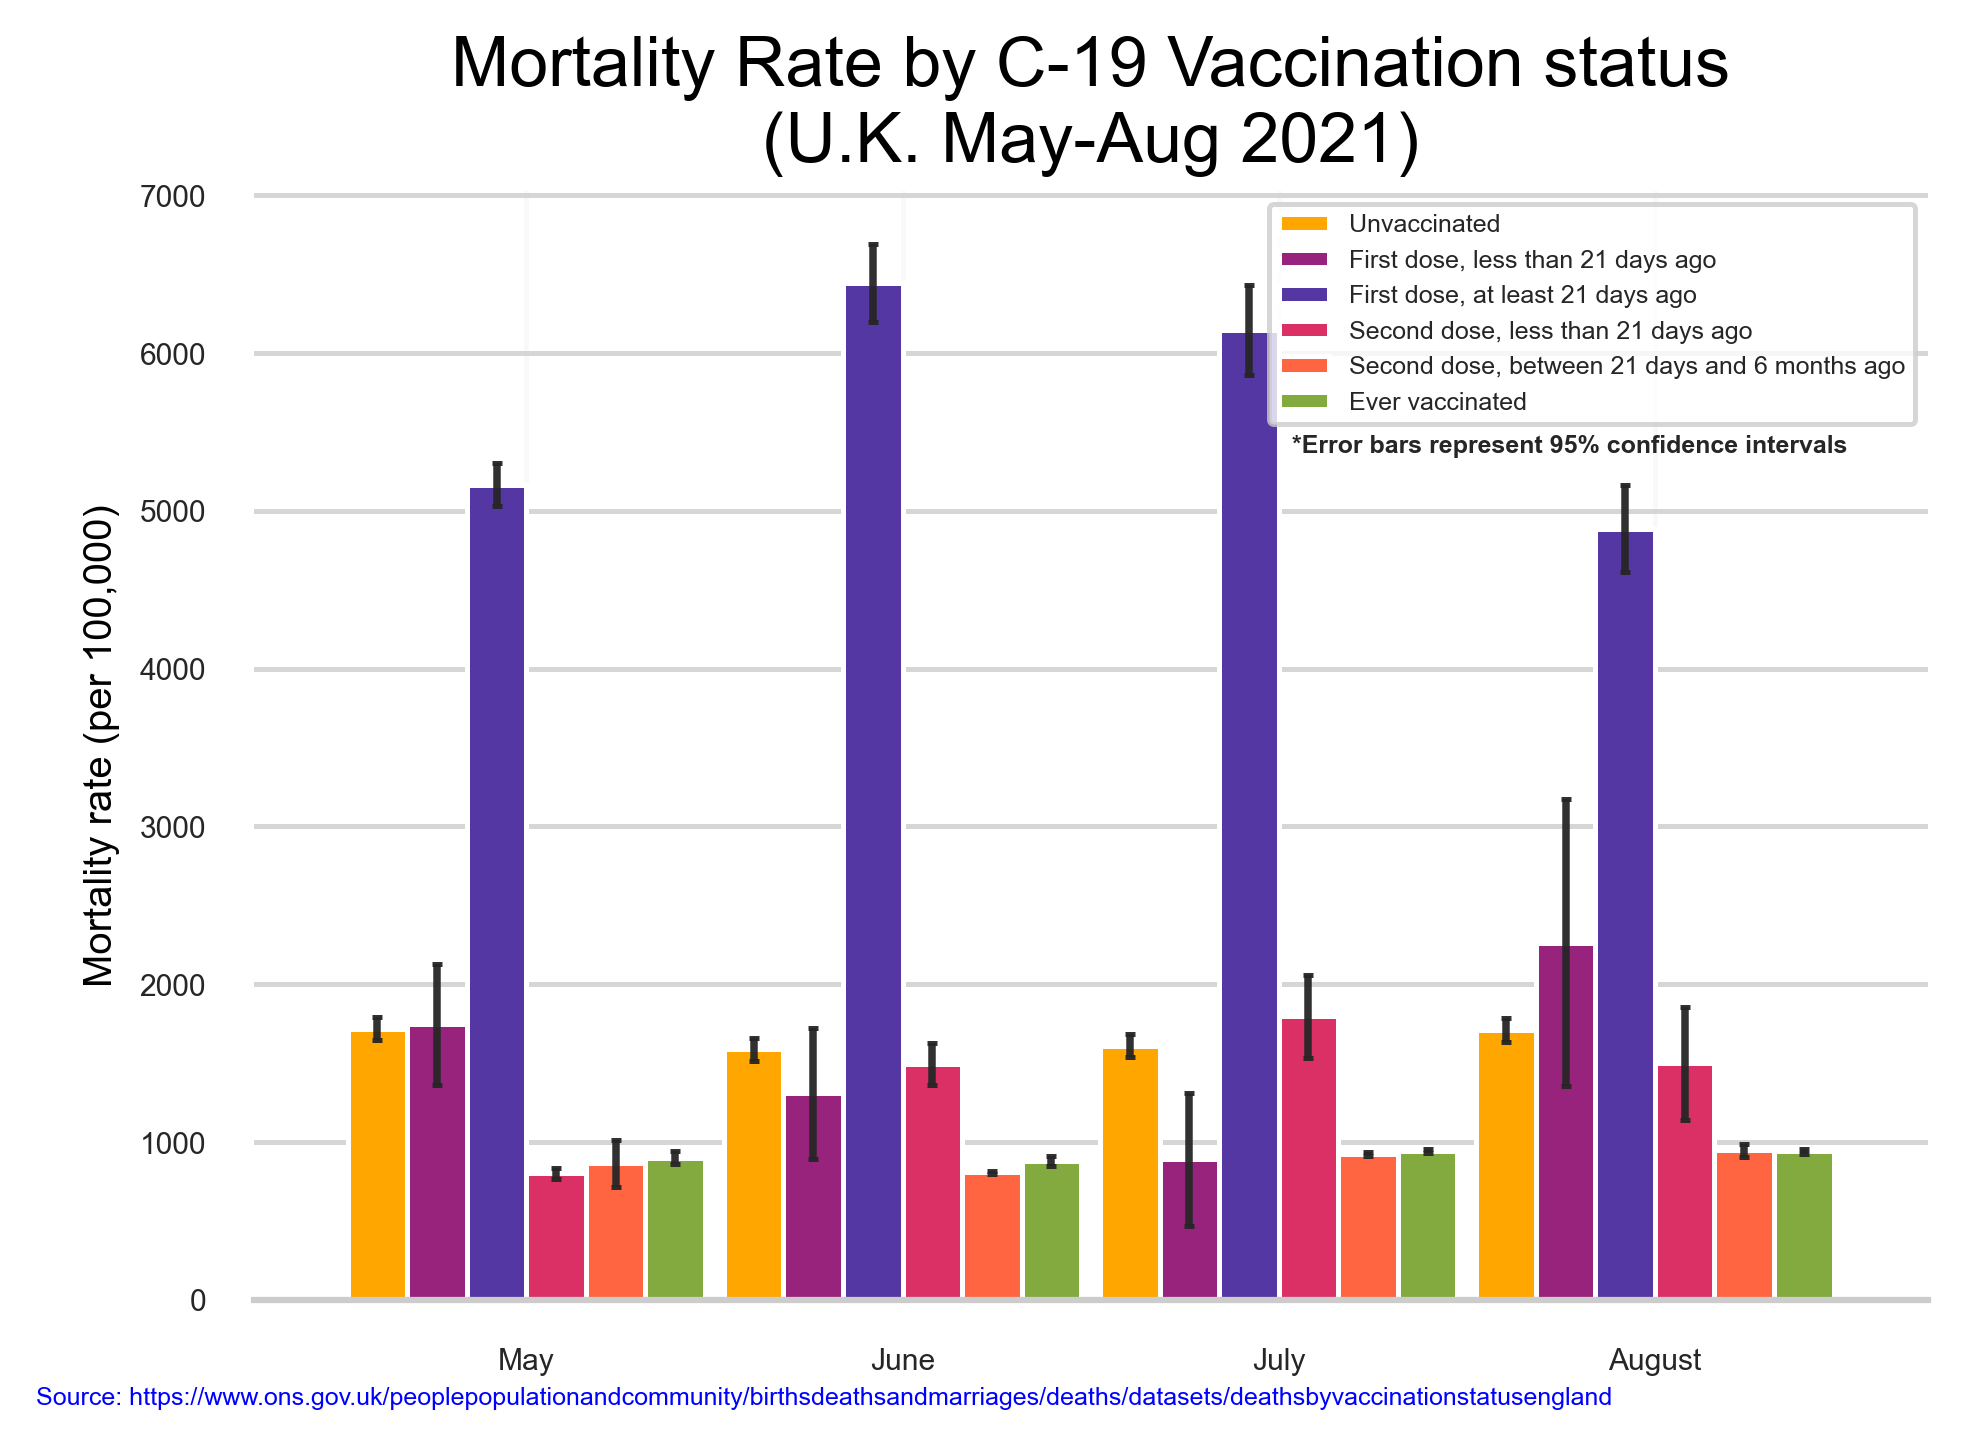

In [62]:
# reshape the dataframe into a wide format for Values
vals = r1.pivot(index='Month', columns='Vaccination status', values='rate')
vals = vals.reindex(columns=new_order2)
vals = vals.reindex(index=order2)
# # reshape the dataframe into a wide format for Errors
yerr = r1.pivot(index='Month', columns='Vaccination status', values='SD')
yerr = yerr.reindex(columns=new_order2)
vals = vals.reindex(index=order2)

ax = vals.plot(kind='bar', yerr=yerr, rot=0, capsize=1, figsize=(6,4), color=colors1, width=.95, error_kw={'alpha': 0.95})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.set_ylim(0.01, 3700)
ax.margins(x=.001)
ax.set_title('Mortality Rate by C-19 Vaccination status\n(U.K. May-Aug 2021)', size=14, color='black')
ax.set_ylabel('Mortality rate (per 100,000)', size=8, color='black')
ax.set_xlabel('')
plt.rcParams['figure.dpi'] = 360
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
#ax.set_ylim(0, 5500)

# add grid lines to the plot
ax.grid(axis='x', alpha=0.1)
ax.grid(axis='y', alpha=0.8)
_ = ax.legend(loc='upper right', fontsize=5)
plt.text(-.13, -0.088, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland', fontsize=5, ha='left', va='center', color='blue',transform=plt.gca().transAxes)
plt.text(.62, .77, '*Error bars represent 95% confidence intervals', fontsize=5, ha='left', va='center', weight='bold', transform=plt.gca().transAxes)